# MLP Regression Model for predicting rate constant values in SECM

### Step 1: Import all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import preprocessing
import csv
import math

### Step 2: Create a dataframe consisting of the approach curve data.
* This data consists of height (in meters) and current (in Ampere) data for rate constant, K, values ranging from (1-9) x $10^{-4}$ to (1-9) x $10^{1}$ (in $m$$s^{-1}$)

In [4]:
df = pd.read_csv('HCK.csv')

### Step 3:Modefying the data frame to the format shown below.

|k|x$_{0}$|y$_{0}$|x$_{1}$|y$_{1}$|x$_{2}$|y$_{2}$|
|---|---|---|---|---|---|---|
|k$_{1}$|x$_{0}$|y$_{0}$|x$_{1}$|y$_{1}$|x$_{2}$|y$_{2}$|
|k$_{2}$|x$_{0}$|y$_{0}$|x$_{1}$|y$_{1}$|x$_{2}$|y$_{2}$|

* Here (x$_{0}$, y$_{0}$), (x$_{1}$, y$_{1}$),... stands for each data point , where height is denoted by x and current is denoted by y,  corresponding to a specified rate constant value such as k$_{1}$ and k$_{2}$
* Therefore all the data pointscorresponding to a specific rate constant value will be represented by one row if the data table

In [5]:
df

,Height,Current,K
0,0.000050,1.560000e-09,1.000
1,0.000048,1.560000e-09,1.000
2,0.000046,1.560000e-09,1.000
3,0.000044,1.560000e-09,1.000
4,0.000042,1.560000e-09,1.000
...,...,...,...
895,0.000010,1.610000e-09,0.009
896,0.000008,1.620000e-09,0.009
897,0.000006,1.620000e-09,0.009
898,0.000004,1.600000e-09,0.009


In [7]:
k_values = df.K.unique()

column_string = 'k, '
for x in range(25):
    column_string += 'x'+str(x)+', ' + 'y'+str(x)+', '
column_string = column_string[:-2]
column_names = column_string.split(', ')

for i, k in enumerate(k_values):
    height_values = df[df['K']==k]['Height'].values.tolist()
    current_values = df[df['K']==k]['Current'].values.tolist()
    row = [k]
    for index, height in enumerate(height_values):
        row.extend([height,current_values[index]])
    row_df = pd.DataFrame([row], columns=column_names)
    if i == 0:
        final_df = row_df
    else:
        final_df = final_df.append(row_df)

column_names

['k',
 'x0',
 'y0',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21',
 'x22',
 'y22',
 'x23',
 'y23',
 'x24',
 'y24']

### Step 4: Defining the input and output values for the MLP Regression model.
* In this case our intput and output will be the height and current data points and the rate constant values respectively.

In [5]:
X = final_df.drop('k',axis=1)
y = final_df['k']
X

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.270000e-09,0.000002,3.360000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.280000e-09,0.000002,3.400000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.280000e-09,0.000002,3.410000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.280000e-09,0.000002,3.420000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.290000e-09,0.000002,3.420000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.290000e-09,0.000002,3.430000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.290000e-09,0.000002,3.430000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.290000e-09,0.000002,3.430000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.730000e-09,0.000008,1.810000e-09,0.000006,1.950000e-09,0.000004,2.290000e-09,0.000002,3.430000e-09
0,0.00005,1.560000e-09,0.000048,1.560000e-09,0.000046,1.560000e-09,0.000044,1.560000e-09,0.000042,1.560000e-09,...,0.00001,1.710000e-09,0.000008,1.780000e-09,0.000006,1.890000e-09,0.000004,2.130000e-09,0.000002,2.820000e-09


### Step 5: Building the MLP Regression model
* By running the model for multiple hidden layers and multiple nodes for multiple activation functions for a specified random state, it was found that the tanh functions with 3 hidden layers where the first, second and third layer consist of 9, 3 and 3 layer to predict the rate constant values with the highest accuracy of which the $R^{2}$ score was a 0.94914.
* Therefore the mentioned number of hidden layers and nodes were used with the tanh activation function to run the model.
* The model was run 5 times with random random states. 
* The resulting 5 sets of predicted vs actual data were plotted.

In [9]:
rs1 = 54
rs2 =12 
rs3 = 11
rs4 = 22
rs5 = 33
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = rs1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(8,5,2), activation = 'tanh' , max_iter=20000000, random_state = rs1)
mlp.fit(X_train,np.log10(y_train))
predictions = mlp.predict(X_test)
score1 = r2_score(predictions, np.log10(y_test))
score1

0.8884660923923463

In [13]:
y_test
predictions

array([-4.18464736e-04, -1.53997524e-01, -2.14333201e+00, -2.12902540e+00,
       -2.16951233e+00, -1.77238977e+00, -1.31622701e+00, -2.17239154e+00])

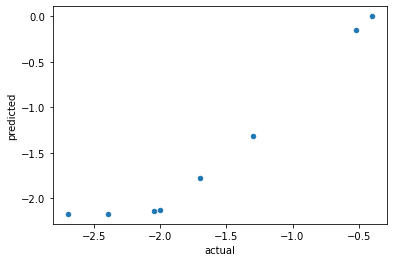

In [90]:
df2_1 = pd.DataFrame({'actual':np.log10(y_test), 'predicted': predictions}, columns = ['actual','predicted'])
df2_1.plot.scatter(x = 'actual', y = 'predicted' )

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = rs2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(8,5,2), activation = 'tanh' , max_iter=20000000, random_state = rs2)
mlp.fit(X_train,np.log10(y_train))
predictions = mlp.predict(X_test)
score2 = r2_score(predictions, np.log10(y_test))
score2

0.8803623318934235

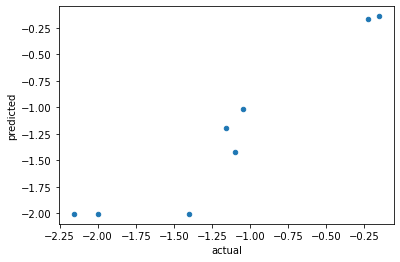

In [92]:
df2_2 = pd.DataFrame({'actual':np.log10(y_test), 'predicted': predictions}, columns = ['actual','predicted'])
df2_2.plot.scatter(x = 'actual', y = 'predicted' )

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = rs3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(8,5,2), activation = 'tanh' , max_iter=20000000, random_state = rs3)
mlp.fit(X_train,np.log10(y_train))
predictions = mlp.predict(X_test)
score3 = r2_score(predictions, np.log10(y_test))
score3

0.9450689128509198

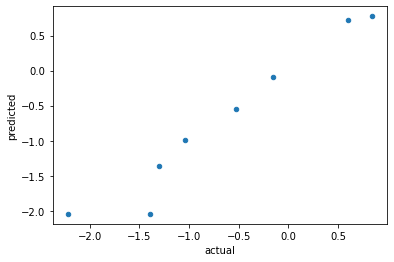

In [94]:
df2_3 = pd.DataFrame({'actual':np.log10(y_test), 'predicted': predictions}, columns = ['actual','predicted'])
df2_3.plot.scatter(x = 'actual', y = 'predicted' )

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = rs4)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(8,5,2), activation = 'tanh' , max_iter=20000000, random_state = rs4)
mlp.fit(X_train,np.log10(y_train))
predictions = mlp.predict(X_test)
score4 = r2_score(predictions, np.log10(y_test))
score4

0.8788093644821128

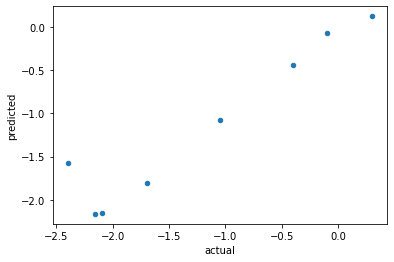

In [96]:
df2_4 = pd.DataFrame({'actual':np.log10(y_test), 'predicted': predictions}, columns = ['actual','predicted'])
df2_4.plot.scatter(x = 'actual', y = 'predicted' )

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = rs5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(8,5,2), activation = 'tanh' , max_iter=20000000, random_state = rs5)
mlp.fit(X_train,np.log10(y_train))
predictions = mlp.predict(X_test)
score5 = r2_score(predictions, np.log10(y_test))
score5

0.8542200149052824

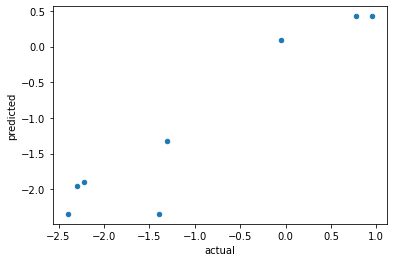

In [98]:
df2_5 = pd.DataFrame({'actual':np.log10(y_test), 'predicted': predictions}, columns = ['actual','predicted'])
df2_5.plot.scatter(x = 'actual', y = 'predicted' )

### Step 6: Average $R^{2}$ score was calculated

In [99]:
(score1+score2+score3+score4+score5)/5

0.889385343304817